# Data Understanding

## Import Library

#### pada tahapan ini terdapat beberapa library yang dibutuhkan sebagai pendukung model sistem rekomendasi

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

#### pada tahapan ini terdapat memuat data yang akan digunakan dalam pembuatan sistem rekomendasi

In [2]:
foods = pd.read_csv('food.csv')

In [3]:
foods.head()

,Food_ID,Name,C_Type,Veg_Non,Describe
0,1,summer squash salad,Healthy Food,veg,"white balsamic vinegar, lemon juice, lemon rin..."
1,2,chicken minced salad,Healthy Food,non-veg,"olive oil, chicken mince, garlic (minced), oni..."
2,3,sweet chilli almonds,Snack,veg,"almonds whole, egg white, curry leaves, salt, ..."
3,4,tricolour salad,Healthy Food,veg,"vinegar, honey/sugar, soy sauce, salt, garlic ..."
4,5,christmas cake,Dessert,veg,"christmas dry fruits (pre-soaked), orange zest..."


# Univariate Exploratory Data Analysis

#### pada tahapan ini terdapat identifikasi data dan menganalisa data yang digunakan dengan mengetahui jumlah baris dan kolom data, missing value pada data dan melakukan distribusi data tiap atribut menggunakan bar plot

In [4]:
foods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food_ID   400 non-null    int64 
 1   Name      400 non-null    object
 2   C_Type    400 non-null    object
 3   Veg_Non   400 non-null    object
 4   Describe  400 non-null    object
dtypes: int64(1), object(4)
memory usage: 15.8+ KB


In [5]:
print(f"Jumlah baris: {foods.shape[0]}, Jumlah kolom: {foods.shape[1]}")

Jumlah baris: 400, Jumlah kolom: 5


In [6]:
# identifikasi missing value data
missing_values = foods.isnull().sum()
missing_values[missing_values > 0]

print(f"jumlah data yang hilang: ", missing_values)

jumlah data yang hilang:  Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64


In [7]:
foods.describe(include="all")

,Food_ID,Name,C_Type,Veg_Non,Describe
count,400.000000,400,400,400,400
unique,NaN,400,16,2,397
top,NaN,Chicken and Dumplings,Indian,veg,riety of rice.
freq,NaN,1,88,238,2
mean,200.500000,NaN,NaN,NaN,NaN
std,115.614301,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,100.750000,NaN,NaN,NaN,NaN
50%,200.500000,NaN,NaN,NaN,NaN
75%,300.250000,NaN,NaN,NaN,NaN


<ipython-input-8-16a185692459>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=foods, y='C_Type', palette='Set2')


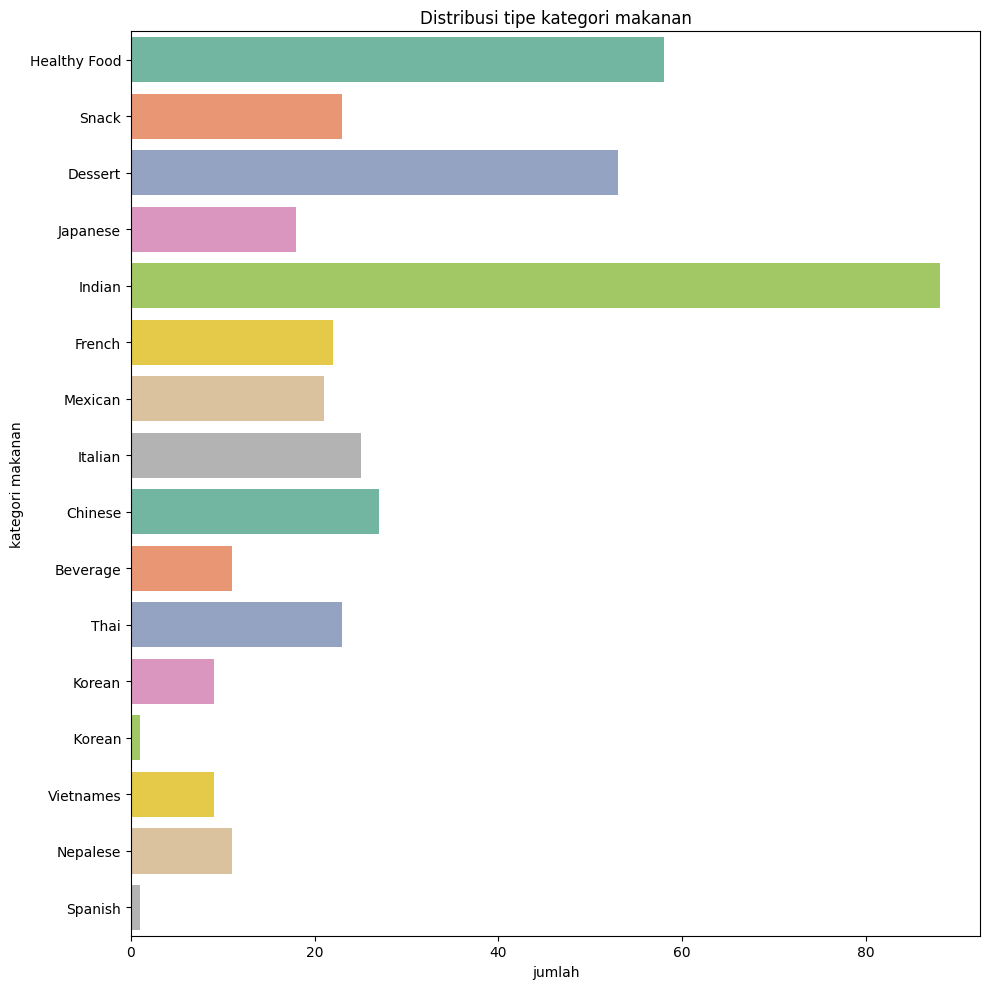

In [8]:

plt.figure(figsize=(10, 10))
sns.countplot(data=foods, y='C_Type', palette='Set2')
plt.title("Distribusi tipe kategori makanan")
plt.ylabel("kategori makanan")
plt.xlabel("jumlah")
plt.tight_layout()
plt.show()

<ipython-input-9-254dabada306>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=foods, y='Veg_Non', palette='Set2')


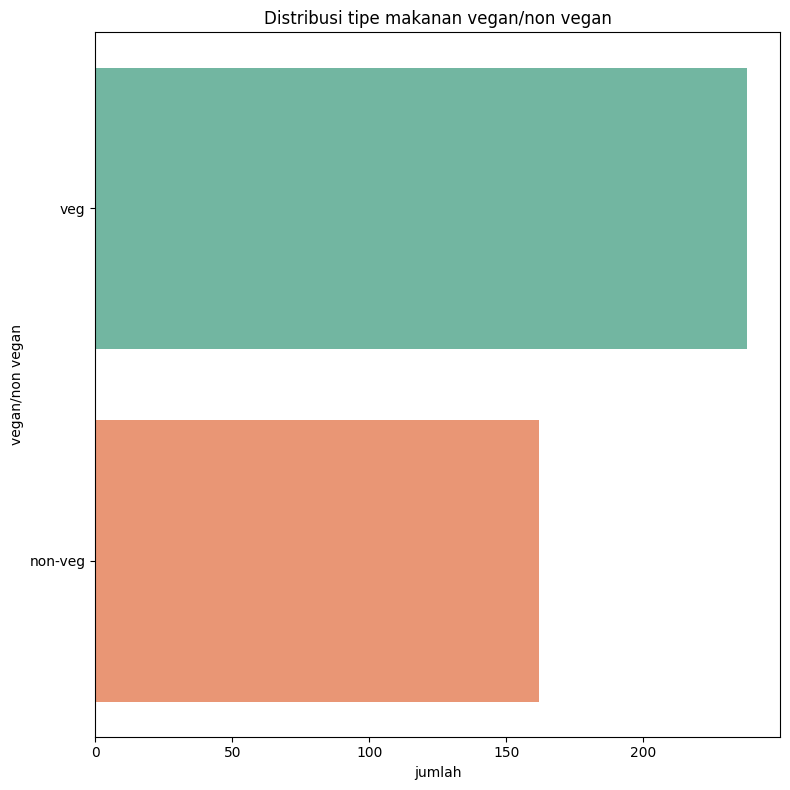

In [9]:
plt.figure(figsize=(8, 8))
sns.countplot(data=foods, y='Veg_Non', palette='Set2')
plt.title("Distribusi tipe makanan vegan/non vegan")
plt.ylabel("vegan/non vegan")
plt.xlabel("jumlah")
plt.tight_layout()
plt.show()

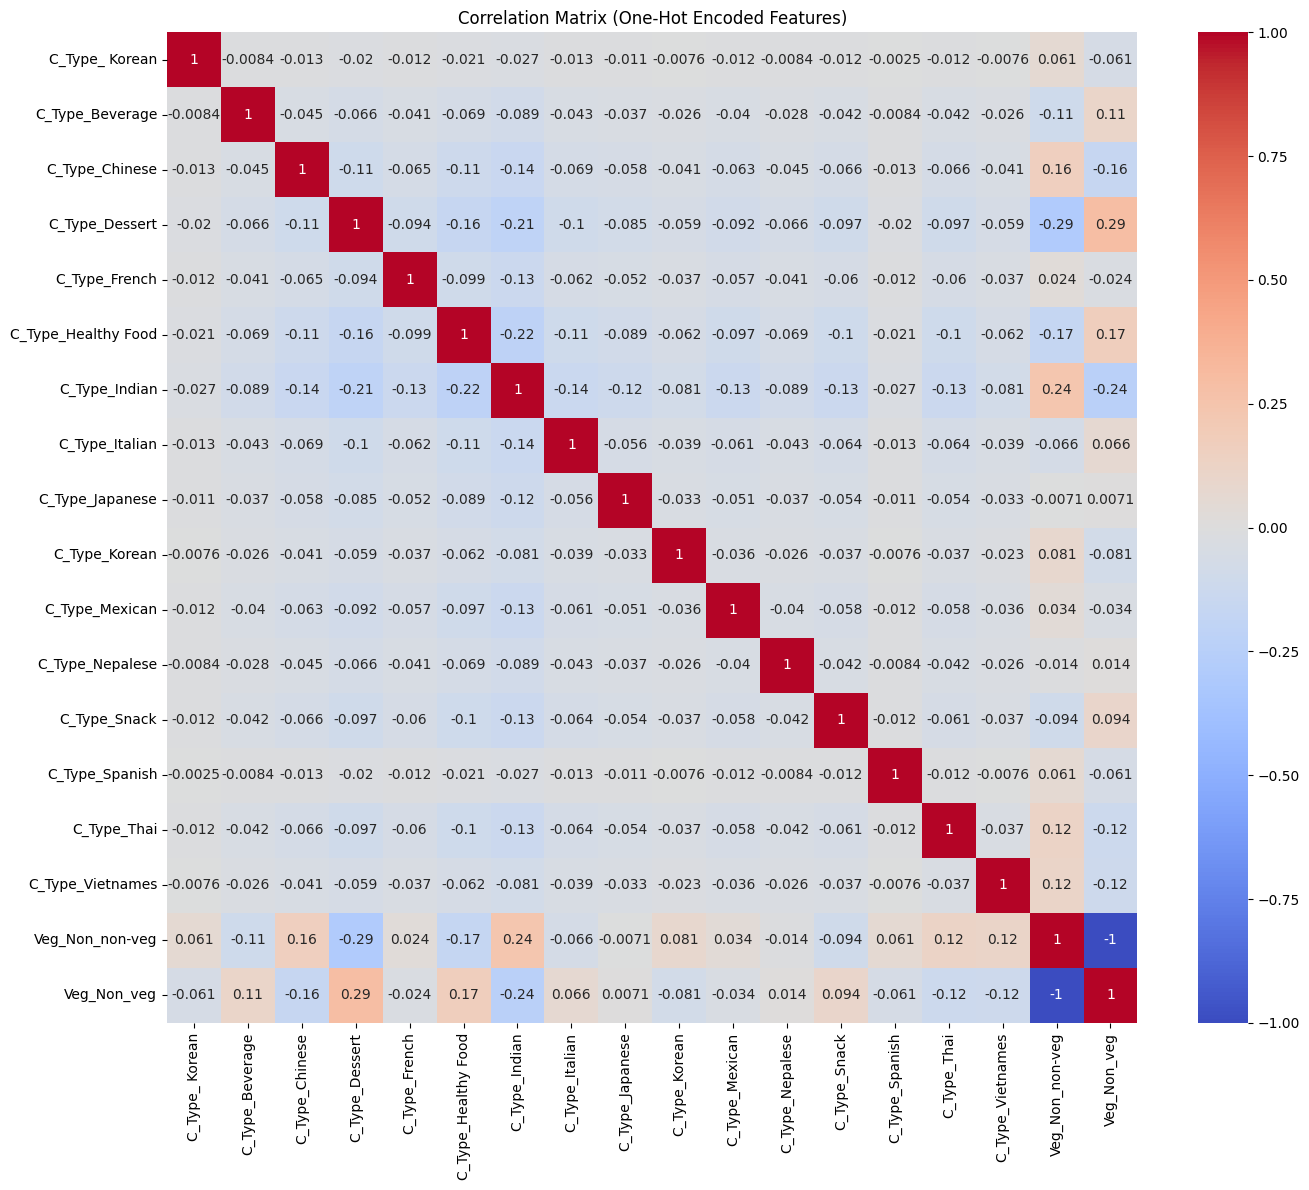

In [10]:
# Korelasi Matrix untuk kolom kategorikal (one-hot encoding untuk visualisasi korelasi)
encoded_df = pd.get_dummies(foods[['C_Type', 'Veg_Non']])
plt.figure(figsize=(14, 12))
sns.heatmap(encoded_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (One-Hot Encoded Features)")
plt.tight_layout()
plt.show()

# Data Preparation

# Data Preprocessing

#### pada tahapan ini terdapat proses cek nilai kosong dan duplikat pada data, pemilihan variabel yang digunakan, penggabungan data yang telah dipilih, dan melakukan vektorisasi

In [11]:
# cek nilai kosong
print("Nilai Kosong: ")
print(foods.isnull().sum())



Nilai Kosong: 
Food_ID     0
Name        0
C_Type      0
Veg_Non     0
Describe    0
dtype: int64


In [12]:
# cek nilai duplikat
print("Nilai Duplikat: ")
print(foods.duplicated().sum())

Nilai Duplikat: 
0


In [13]:
# Gabungkan fitur untuk TF-IDF
foods['content'] = foods['C_Type'].fillna('') + ' ' + foods['Veg_Non'].fillna('') + ' ' + foods['Describe'].fillna('')
foods['content'] = foods['content'].str.lower()

In [14]:
# TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(foods['content'])



# Model Development



#### pada tahapan ini terdapat melakukan modelling dan pengujian hasil rekomendasi menggunakan teknik Cosine similarity sebagai pertimbangan hasil rekomendasi

In [15]:

# Cosine similarity antar makanan
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Buat mapping dari nama makanan ke index
indices = pd.Series(foods.index, index=foods['Name'].str.lower()).drop_duplicates()

In [16]:
def recommend_food(name, top_n=5):
    name = name.lower()
    if name not in indices:
        return f"Makanan '{name}' tidak ditemukan dalam data."

    idx = indices[name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    food_indices = [i[0] for i in sim_scores]
    return foods[['Name', 'C_Type', 'Veg_Non']].iloc[food_indices]


In [17]:
recommend_food("cashew nut cookies", top_n=5)


,Name,C_Type,Veg_Non
202,banana and chia tea cake,Dessert,veg
276,microwave chocolate cake,Dessert,veg
198,lemon poppy seed cake,Dessert,veg
256,ragi oats ladoo (laddu),Dessert,veg
250,lemon poppy seed cake,Dessert,veg


# Evaluasi

#### pada tahapan ini terdapat evaluasi hasil rekomendasi menggunakan precision@k sebagai pertimbangkan kemiripan hasil rekomendasi

In [18]:
from sklearn.metrics import precision_score

def precision_at_k(query_item, k=5):
    query_item = query_item.lower()

    # Cek apakah item ada dalam data
    if query_item not in indices:
        print(f"Makanan '{query_item}' tidak ditemukan dalam data.")
        return

    # Ambil index dan kategori (label relevansi) dari query item
    idx = indices[query_item]
    actual_type = foods.loc[idx, 'C_Type']

    # Ambil top-K rekomendasi makanan
    recommended = recommend_food(query_item, top_n=k)

    # Label relevansi: 1 jika kategori sama dengan query, 0 jika tidak
    y_true = [1 if ctype == actual_type else 0 for ctype in recommended['C_Type']]
    y_pred = [1] * len(y_true)  # Karena semua hasil rekomendasi dianggap "positif" oleh sistem

    # Precision@K = jumlah item relevan / jumlah total rekomendasi (K)
    precision = precision_score(y_true, y_pred, zero_division=0)

    print(f"Precision@{k} untuk: {query_item.title()} ({actual_type})")
    print(f"Precision@{k}: {precision:.2f}")
    print("\nRekomendasi:")
    print(recommended[['Name', 'C_Type', 'Veg_Non']])


In [19]:
precision_at_k("cashew nut cookies", k=5)


Precision@5 untuk: Cashew Nut Cookies (Dessert)
Precision@5: 1.00

Rekomendasi:
                         Name   C_Type Veg_Non
202  banana and chia tea cake  Dessert     veg
276  microwave chocolate cake  Dessert     veg
198     lemon poppy seed cake  Dessert     veg
256   ragi oats ladoo (laddu)  Dessert     veg
250    lemon poppy seed cake   Dessert     veg
